#Credit Card Fraud Detection

In [ ]:
#visualisation and preprocessing
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

# Metrics and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import lightgbm as lgb
from sklearn import metrics

#models
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost as xgb

#hypertunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_columns', 100)

import os

Load the dataset and check its attributes

In [ ]:
df = pd.read_csv("creditcard.csv")
print(df.head())
print(df.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

Scaling the attributes

In [ ]:
sc = StandardScaler()
df['Amount']=sc.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time']=sc.fit_transform(df['Time'].values.reshape(-1,1))

Check the dataset for imbalance

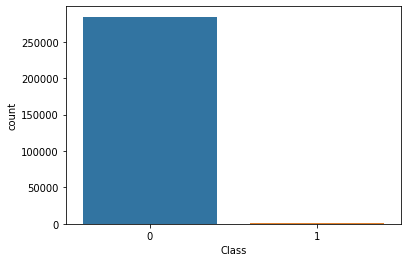

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
sns.countplot(y)

Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=40, stratify=y)

#Extra Tree Classifier


[0.01691711 0.01305238 0.01664428 0.03053935 0.03997216 0.01404874
 0.01368081 0.02270888 0.01469342 0.03397932 0.06642461 0.07964682
 0.13272324 0.01115284 0.10384139 0.01291194 0.05774172 0.14057617
 0.04077025 0.01498348 0.01283014 0.01604973 0.01208155 0.00969677
 0.01254506 0.01089233 0.01413413 0.01241816 0.01073321 0.01161004]


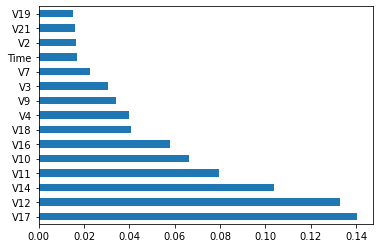

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
y_pred = model.predict(X_test)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Normal Logistic Regression with all columns as features")
print("F1 score is {}".format(f1_score(y_test, y_pred)))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("AUC is {}".format(metrics.auc(fpr, tpr)))
print("Recall is {}".format(metrics.recall_score(y_test, y_pred)))
print("Precision is {}".format(metrics.precision_score(y_test, y_pred)))

Normal Logistic Regression with all columns as features
F1 score is 0.6857142857142857
AUC is 0.7790094726000842
Recall is 0.5581395348837209
Precision is 0.8888888888888888


#Random Forest

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Random Forest with all columns as features")
print("F1 score is {}".format(f1_score(y_test, y_pred)))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("AUC is {}".format(metrics.auc(fpr, tpr)))
print("Recall is {}".format(metrics.recall_score(y_test, y_pred)))
print("Precision is {}".format(metrics.precision_score(y_test, y_pred)))

Random Forest with all columns as features
F1 score is 0.8200000000000001
AUC is 0.8575330166841436
Recall is 0.7151162790697675
Precision is 0.9609375


#XGB

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)

In [ ]:
print("xgboost with all columns as features")
print("F1 score is {}".format(f1_score(y_test, y_pred)))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("AUC is {}".format(metrics.auc(fpr, tpr)))
print("Recall is {}".format(metrics.recall_score(y_test, y_pred)))
print("Precision is {}".format(metrics.precision_score(y_test, y_pred)))

xgboost with all columns as features
F1 score is 0.823529411764706
AUC is 0.8662388732062576
Recall is 0.7325581395348837
Precision is 0.9402985074626866


Hypertunning


In [ ]:
model = xgb.XGBClassifier()
n_estimators = range(50, 100, 50)
param_grid = dict(n_estimators=n_estimators)

max_depth = range(5, 8, 2)
param_grid['max_depth'] = max_depth
print(param_grid)

{'n_estimators': range(50, 100, 50), 'max_depth': range(5, 8, 2)}


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold,verbose = 3)
grid_result = grid_search.fit(X_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
grid_result.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.1min finished


Best: -0.005114 using {'max_depth': 5, 'n_estimators': 50}


{'max_depth': 5, 'n_estimators': 50}

In [ ]:
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
print("hypertunned xgboost with all columns as features")
print("F1 score is {}".format(f1_score(y_test, y_pred)))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("AUC is {}".format(metrics.auc(fpr, tpr)))
print("Recall is {}".format(metrics.recall_score(y_test, y_pred)))
print("Precision is {}".format(metrics.precision_score(y_test, y_pred)))

hypertunned xgboost with all columns as features
F1 score is 0.814569536423841
AUC is 0.8575229675438476
Recall is 0.7151162790697675
Precision is 0.9461538461538461


Balacing the dataset for a better result

In [29]:
fraud_df = df[df['Class'] ==1]
no_of_fraud = fraud_df.shape[0]
print("Total Fraud in Train Data :" ,no_of_fraud)

no_of_non_fraud = no_of_fraud * 20
non_fraud_df = df[df['Class'] ==0].sample(no_of_non_fraud , random_state =2021,replace=True)
no_of_non_fraud = non_fraud_df.shape[0]
print("Total non Fraud in Train Data :" ,no_of_non_fraud)

Total Fraud in Train Data : 492
Total non Fraud in Train Data : 9840


In [30]:
train_df = pd.concat([fraud_df,non_fraud_df] , axis =0 )

In [31]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]
print(X.shape)
print(y.shape)

(10332, 30)
(10332,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [33]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold,verbose = 3)
grid_result = grid_search.fit(X_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
grid_result.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.2s finished


Best: -0.038839 using {'max_depth': 7, 'n_estimators': 50}


{'max_depth': 7, 'n_estimators': 50}

In [34]:
y_pred = grid_result.best_estimator_.predict(X_test)

In [35]:
print("hypertunned xgboost with balanced dataset")
print("F1 score is {}".format(f1_score(y_test, y_pred)))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("AUC is {}".format(metrics.auc(fpr, tpr)))
print("Recall is {}".format(metrics.recall_score(y_test, y_pred)))
print("Precision is {}".format(metrics.precision_score(y_test, y_pred)))

hypertunned xgboost with balanced dataset
F1 score is 0.9206349206349206
AUC is 0.9304387458074393
Recall is 0.8613861386138614
Precision is 0.9886363636363636
